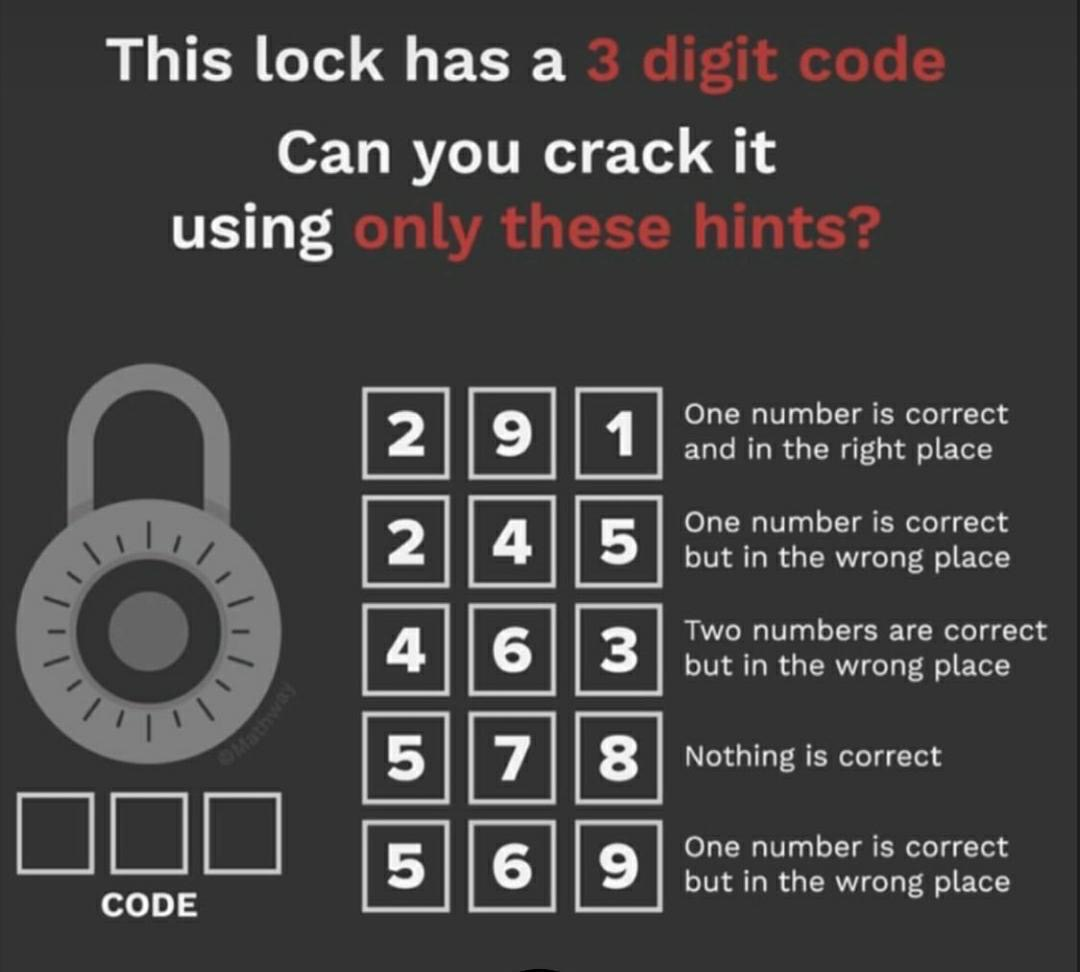

In [111]:
from z3 import *

In [112]:
x1, x2, x3 = Ints('x1 x2 x3')
s = Solver()

Basic setup of the problem space

In [113]:
s.add(x1 > 0, x1 < 10)
s.add(x2 > 0, x2 < 10)
s.add(x3 > 0, x3 < 10)
s.add(Distinct(x1, x2, x3))

Clause 1

In [114]:
s1 = And(x1==2, x2!=9, x3!=1)
s2 = And(x1!=2, x2==9, x3!=1)
s2 = And(x1!=2, x2!=9, x3==1)
s.add(Or(s1,s2,s3))

Clause 2

In [115]:
s1 = And(Or(x1==4, x1==5), x1!=2)
s2 = And(Or(x2==2, x2==5), x2!=4)
s3 = And(Or(x3==2, x3==4), x3!=5)
s_is_s1 = And(s1,Not(s2),Not(s3))
s_is_s2 = And(Not(s1), Not(s2), s3)
s_is_s3 = And(Not(s1), s2, Not(s3))
s.add(Or(s_is_s1, s_is_s2,s_is_s3))

Clause 3

In [116]:
s1 = Or(And(x2==3, x3==6), And(x1==3, x3==6), And(x1==6, x2==3))
s2 = Or(And(x1==3, x3==4), And(x1==3, x2==4), And(x2==3, x3==4))
s3 = Or(And(x1==6, x2==4), And(x1==6, x3==4), And(x2==4, x3==3))
s1_is_correct = And(s1, Not(s2), Not(s3))
s2_is_correct = And(Not(s1), s2, Not(s3))
s3_is_correct = And(Not(s1), Not(s2), s3)
s.add(Or(s1_is_correct,s2_is_correct,s3_is_correct))

Clause 4

In [117]:
s.add(x1!=5, x2!=7, x3!=8)

Clause 5

In [118]:
x1_is_not_5 = And(x1!=5, Or(x2==5, x3==5))
x2_is_not_6 = And(x2!=6, Or(x1==6, x3==6))
x3_is_not_9 = And(x3!=9, Or(x1==9, x2==9))
s1 = And(x1_is_not_5, Not(x2_is_not_6), Not(x3_is_not_9))
s2 = And(Not(x1_is_not_5), x2_is_not_6, Not(x3_is_not_9))
s3 = And(Not(x1_is_not_5), Not(x2_is_not_6), x3_is_not_9)
s.add(Or(s1, s2, s3))

In [119]:
for a in s.assertions():
    print(a)


x1 > 0
x1 < 10
x2 > 0
x2 < 10
x3 > 0
x3 < 10
Distinct(x1, x2, x3)
Or(And(x1 == 2, x2 != 9, x3 != 1),
   And(x1 != 2, x2 != 9, x3 == 1),
   And(Not(And(x1 != 5, Or(x2 == 5, x3 == 5))),
       Not(And(x2 != 6, Or(x1 == 6, x3 == 6))),
       And(x3 != 9, Or(x1 == 9, x2 == 9))))
Or(And(And(Or(x1 == 4, x1 == 5), x1 != 2),
       Not(And(Or(x2 == 2, x2 == 5), x2 != 4)),
       Not(And(Or(x3 == 2, x3 == 4), x3 != 5))),
   And(Not(And(Or(x1 == 4, x1 == 5), x1 != 2)),
       Not(And(Or(x2 == 2, x2 == 5), x2 != 4)),
       And(Or(x3 == 2, x3 == 4), x3 != 5)),
   And(Not(And(Or(x1 == 4, x1 == 5), x1 != 2)),
       And(Or(x2 == 2, x2 == 5), x2 != 4),
       Not(And(Or(x3 == 2, x3 == 4), x3 != 5))))
Or(And(Or(And(x2 == 3, x3 == 6),
          And(x1 == 3, x3 == 6),
          And(x1 == 6, x2 == 3)),
       Not(Or(And(x1 == 3, x3 == 4),
              And(x1 == 3, x2 == 4),
              And(x2 == 3, x3 == 4))),
       Not(Or(And(x1 == 6, x2 == 4),
              And(x1 == 6, x3 == 4),
              And

In [120]:
s.check()
m = s.model()
for d in m.decls():
    print('%s = %s'%(d.name(), m[d]))

x3 = 4
x2 = 3
x1 = 9
